In [ ]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import os
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model
import pandas as pd

In [ ]:
tf.__version__
keras.__version__

'2.3.0-tf'

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_valid ,X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0

y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dropout(rate = 0.2))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dropout(rate = 0.2))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(rate = 0.2))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [ ]:
# hidden1 = model.layers[1]
# weights, biases = hidden1.get_weights()


In [ ]:
# biases.shape

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs = 30)

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5811 - accuracy: 0.7900 - val_loss: 0.3999 - val_accuracy: 0.8556
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4467 - accuracy: 0.8361 - val_loss: 0.3564 - val_accuracy: 0.8708
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4127 - accuracy: 0.8474 - val_loss: 0.3447 - val_accuracy: 0.8740
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3942 - accuracy: 0.8536 - val_loss: 0.3258 - val_accuracy: 0.8806
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3781 - accuracy: 0.8598 - val_loss: 0.3328 - val_accuracy: 0.8814
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3639 - accuracy: 0.8643 - val_loss: 0.3279 - val_accuracy: 0.8796
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3538 - accuracy: 0.8685 - val_loss: 0.3224 - val_accuracy:

In [ ]:
model.evaluate(X_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 40.5374 - accuracy: 0.8600


[40.537376403808594, 0.8600000143051147]

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
loaded_model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 56.5453 - accuracy: 0.8531


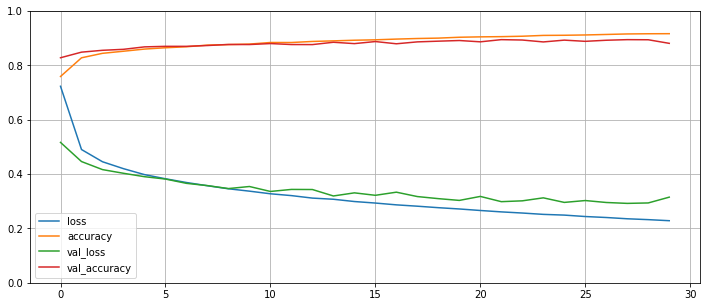

In [ ]:
df = pd.DataFrame(history.history)
df.plot(figsize=(12,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
